## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。


In [32]:
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')

pd.set_option('display.max_rows', 20000)  # 如果数据集的行数少于 display.max_rows，默认会显示所有行
pd.set_option('display.max_columns', 5)  # 显示最多5列，超过就会截断

print(df)

#恢复默认
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



       label   type  ...                 updated_at  text_bot_count
0      Human   True  ...  2023-10-13 11:21:10+00:00               0
1      Human   True  ...  2023-10-07 06:26:14+00:00               0
2      Human   True  ...  2023-10-02 02:11:21+00:00               0
3        Bot   True  ...  2023-10-12 12:54:59+00:00               0
4      Human   True  ...  2023-10-06 11:58:41+00:00               0
5      Human   True  ...  2023-10-11 05:59:26+00:00               0
6      Human   True  ...  2023-09-27 09:04:56+00:00               0
7      Human   True  ...  2023-08-07 16:06:34+00:00               0
8      Human   True  ...  2023-10-12 11:55:01+00:00               0
9      Human   True  ...  2023-10-09 20:47:05+00:00               0
10     Human   True  ...  2023-10-05 11:27:42+00:00               0
11     Human   True  ...  2023-10-14 02:56:25+00:00               0
12     Human   True  ...  2023-09-22 12:01:52+00:00               0
13     Human   True  ...  2023-09-27 06:39:00+00

2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。

In [33]:
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')

print("前几行数据:")
print(df.head())  

print("\n数据框信息:")
df.info()

print("\n描述性统计信息:")
print(df.describe())


前几行数据:
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  

3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [34]:
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')

#日期格式化：将 `created_at` 和 `updated_at` 转换为日期类型
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

#百分比格式化：计算粉丝关注率（followers / (followers + following)）
df['follower_rate'] = df['followers'] / (df['followers'] + df['following']) * 100

#布尔值转为更易读的文本
df['hireable_text'] = df['hireable'].apply(lambda x: 'Yes' if x else 'No')

print(df[['created_at', 'updated_at', 'follower_rate', 'hireable_text']].head())


                 created_at                updated_at  follower_rate  \
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00      83.333333   
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00      60.000000   
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00      84.577809   
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00      97.674419   
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00      75.000000   

  hireable_text  
0            No  
1           Yes  
2           Yes  
3            No  
4           Yes  


4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')

log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for col in log_columns:
    df[f'log_{col}'] = np.log1p(df[col]) 

print("原始值与对数变换值的比较:")
print(df[[col for col in log_columns] + [f'log_{col}' for col in log_columns]].head())



原始值与对数变换值的比较:
   public_repos  public_gists  followers  following  log_public_repos  \
0            26             1          5          1          3.295837   
1            30             3          9          6          3.433987   
2           103            49       1212        221          4.644391   
3            49             0         84          2          3.912023   
4            11             1          6          2          2.484907   

   log_public_gists  log_followers  log_following  
0          0.693147       1.791759       0.693147  
1          1.386294       2.302585       1.945910  
2          3.912023       7.100852       5.402677  
3          0.000000       4.442651       1.098612  
4          0.693147       1.945910       1.098612  


5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。

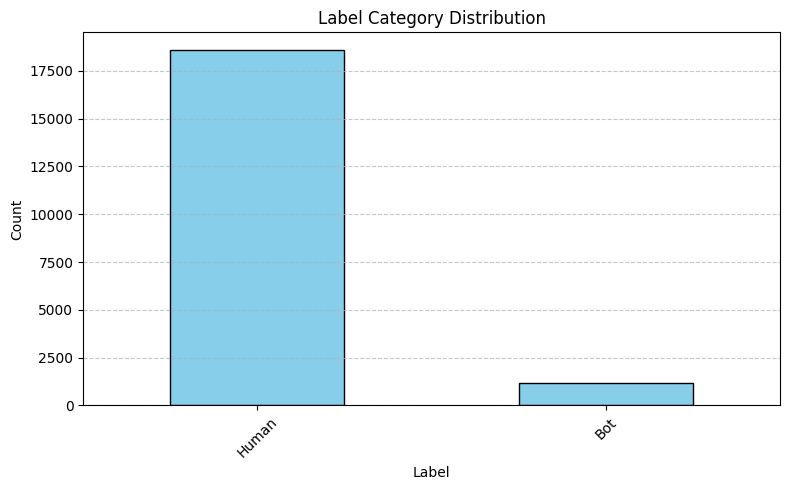

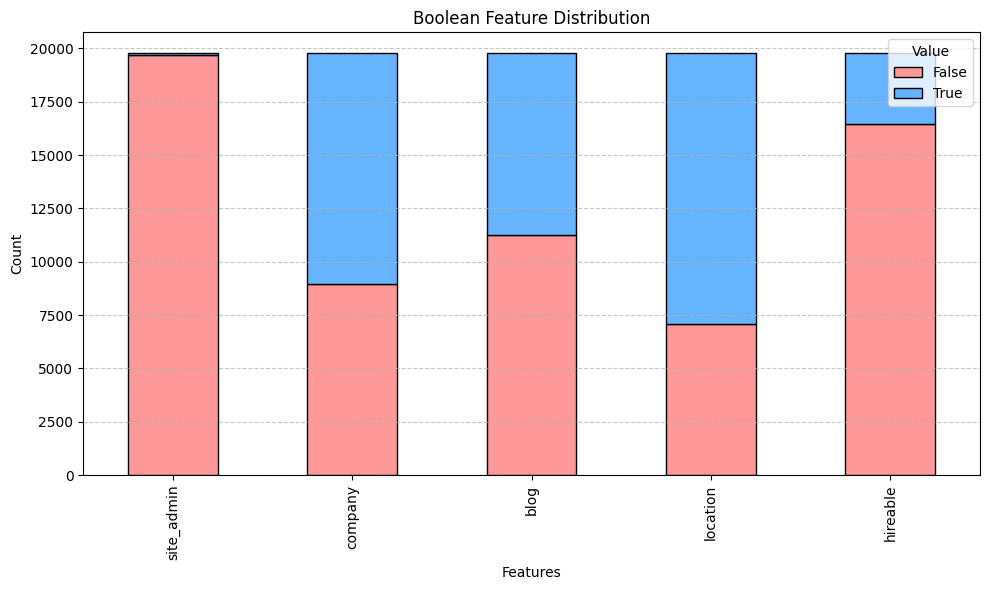

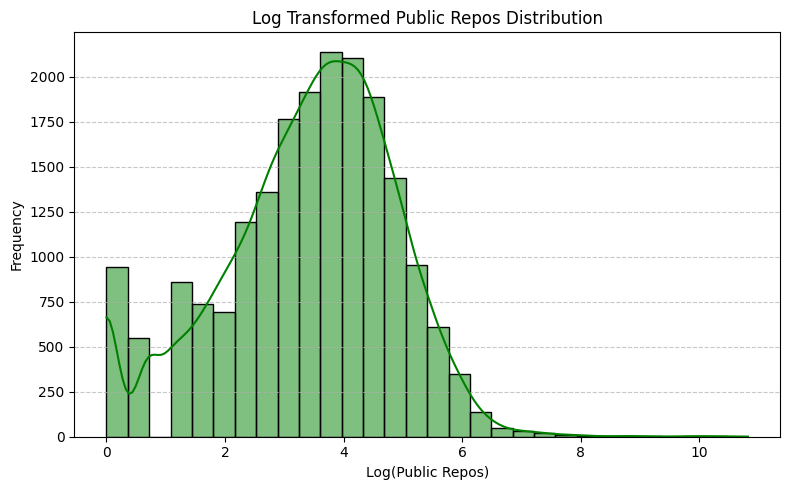

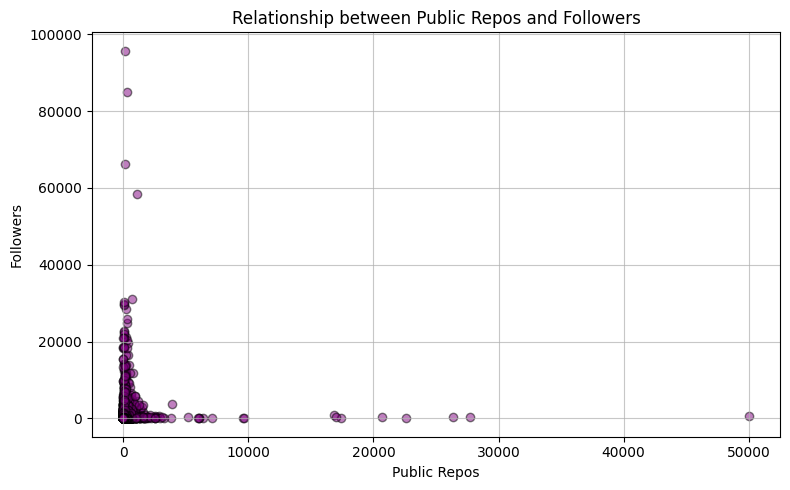

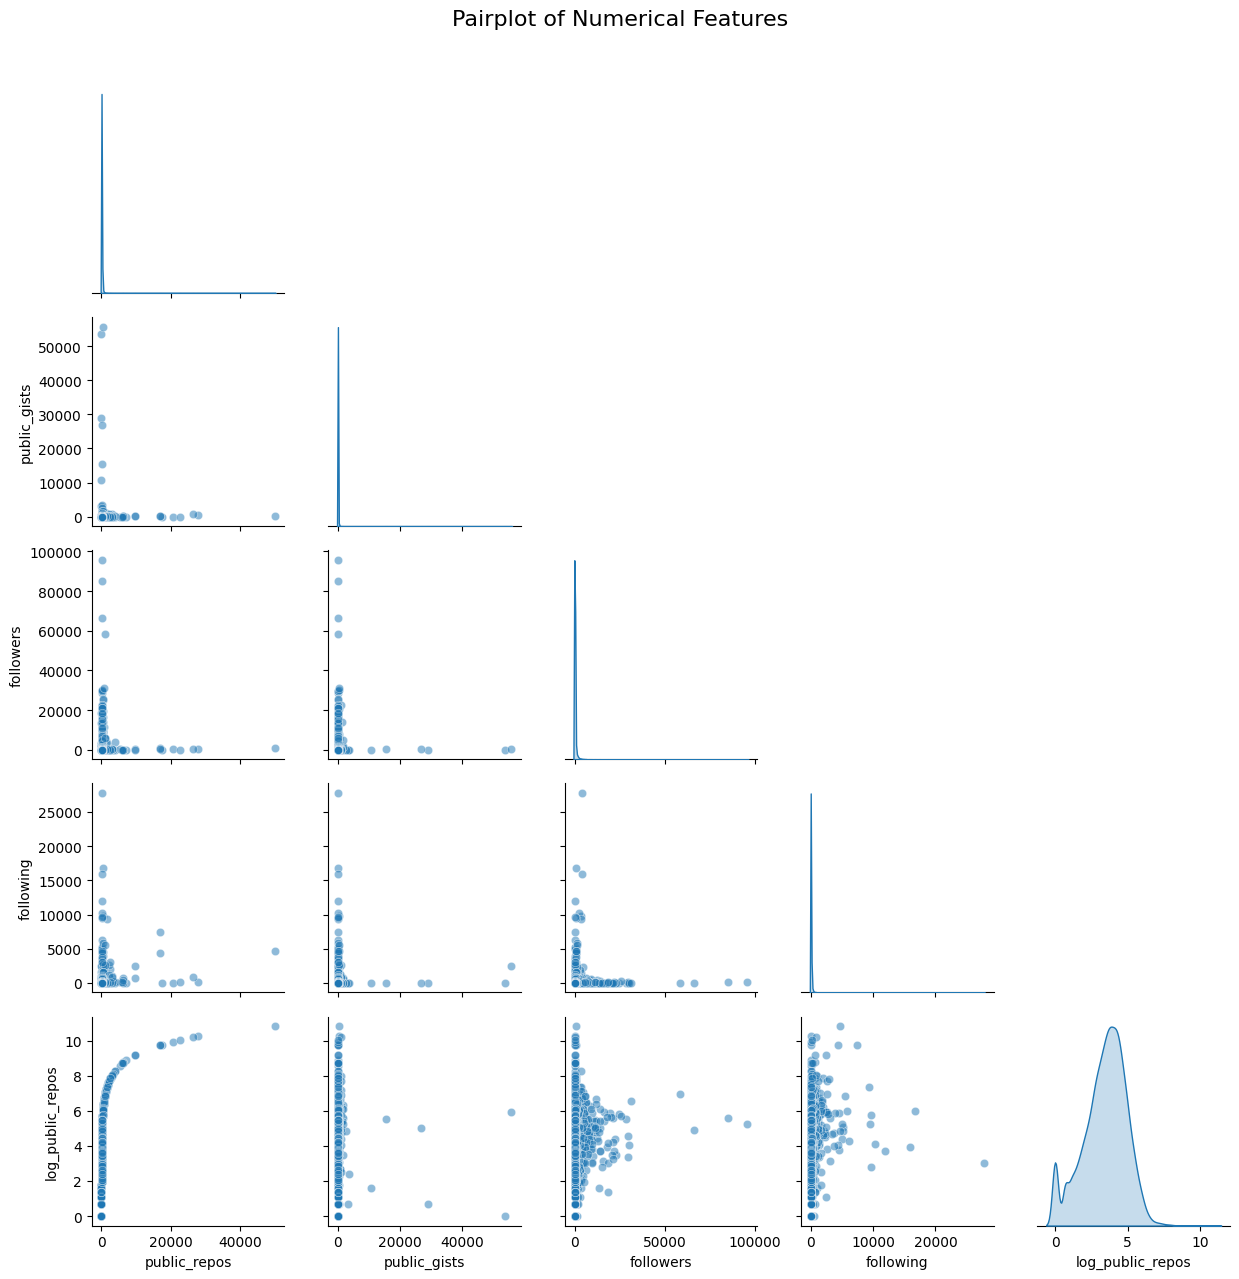

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/github_bot_processed_data.csv')

log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for col in log_columns:
    df[f'log_{col}'] = np.log1p(df[col])


label_counts = df['label'].value_counts()


plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Category Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']
bool_counts = df[bool_features].apply(pd.Series.value_counts).T


bool_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'], edgecolor='black')
plt.title('Boolean Feature Distribution')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(['False', 'True'], title='Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['log_public_repos'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Log Transformed Public Repos Distribution')
plt.xlabel('Log(Public Repos)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['public_repos'], df['followers'], alpha=0.5, color='purple', edgecolor='black')
plt.title('Relationship between Public Repos and Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


numerical_features = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos']


sns.pairplot(df[numerical_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()





6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。

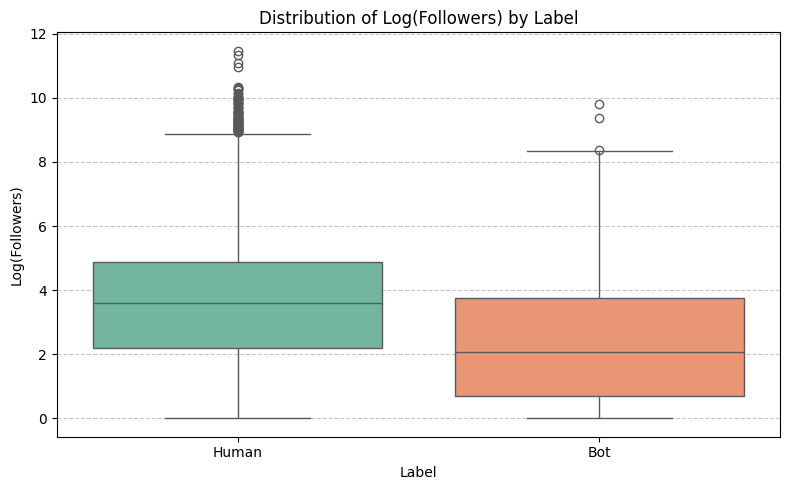

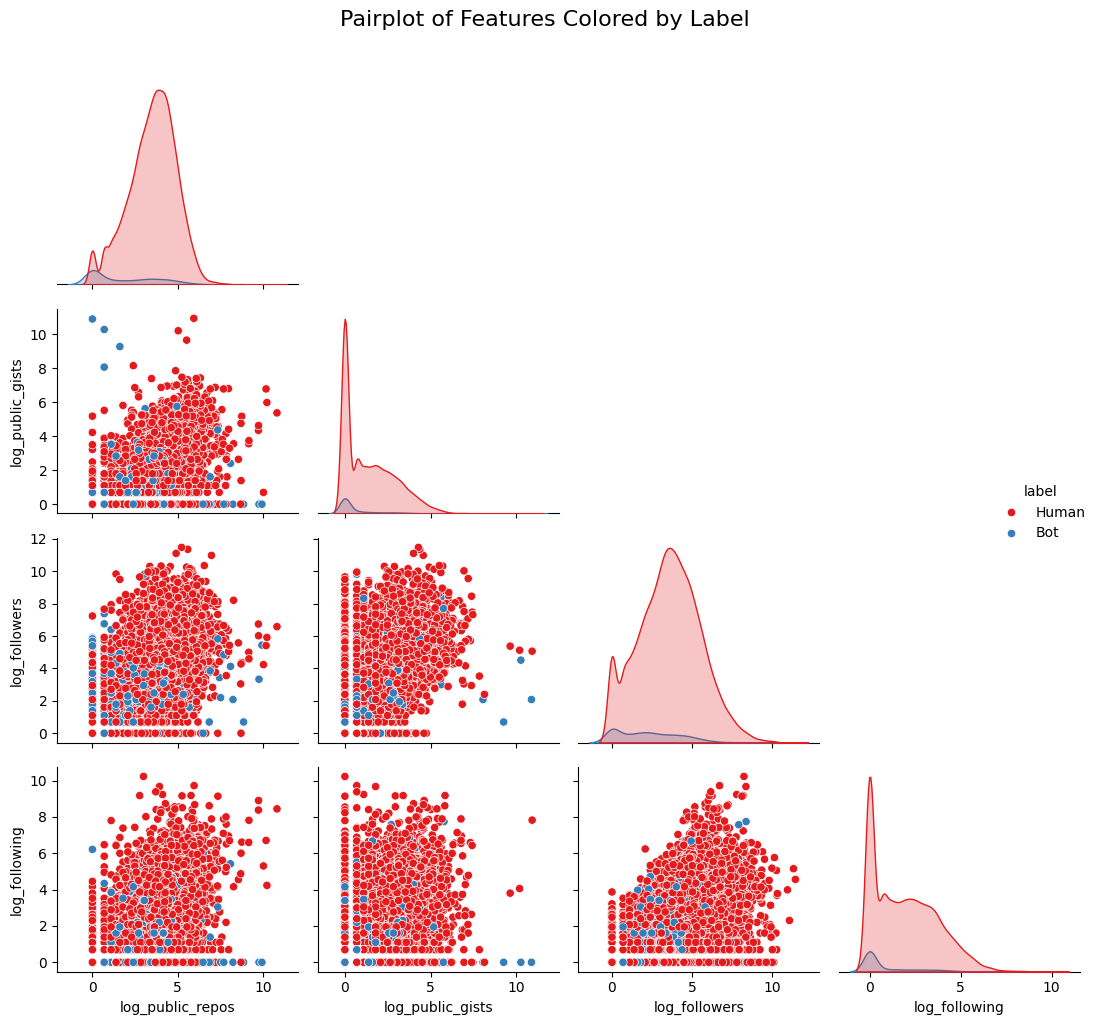

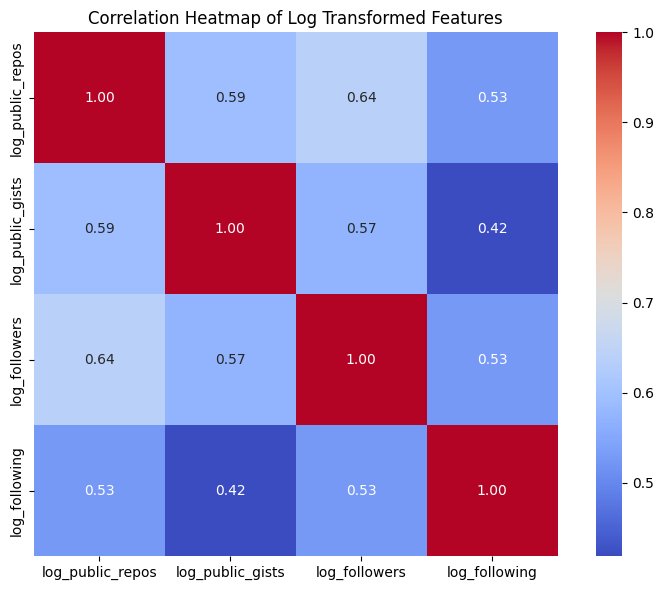

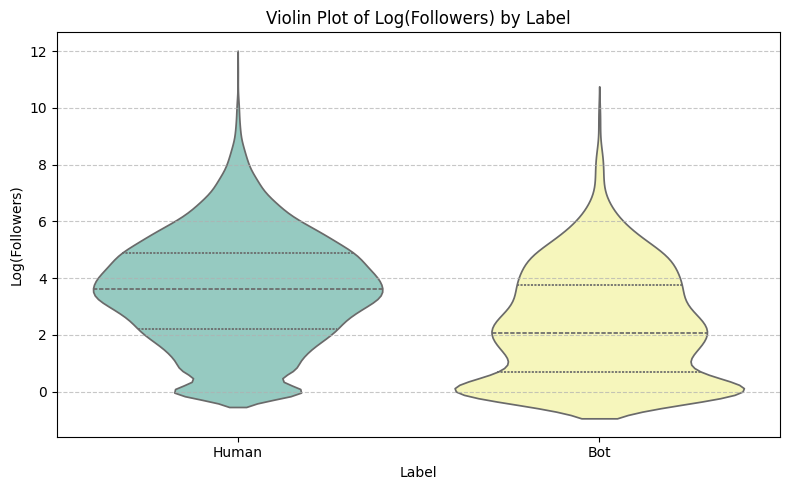

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/github_bot_processed_data.csv')

log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for col in log_columns:
    df[f'log_{col}'] = np.log1p(df[col])


plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='log_followers', data=df, hue='label', palette='Set2', legend=False)
plt.title('Distribution of Log(Followers) by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']


sns.pairplot(df, vars=features, hue='label', diag_kind='kde', palette='Set1', corner=True)
plt.suptitle('Pairplot of Features Colored by Label', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Log Transformed Features')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.violinplot(x='label', y='log_followers', data=df, hue='label', palette='Set3', inner='quartile', density_norm='width', legend=False)
plt.title('Violin Plot of Log(Followers) by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('data/github_bot_processed_data.csv')

profile = ProfileReport(df, title="Interactive Data Analysis Report", explorative=True)

profile.to_file("data_analysis_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 126.17it/s]


数据分析：
1. 统计分布：总共有15个变量，19765条观测数据，没有用重复的行，占内存6.2MB。其中15个变量中有1个Categorical，6个Boolean，一个text，5个numeric，2个datetime.
2. 缺失值：占总比的3.7%，最主要的是变量bio的缺失值，达到了55.3%的缺失率
3. 异常值：可以比较每一个变量的最大值的最小值和规定范围确定。